In [1]:
import pandas as pd

df=pd.read_csv('social_survey.csv')

In [2]:
df.drop(['타임스탬프', '이후 질문들은 2024년 2학기 기준으로 답변해 주세요!','이후 질문은 특별한 내용이 없으면 지난 2024-2학기 기준으로 응답해주시기 바랍니다!'], axis=1, errors='ignore', inplace=True)

df.rename(columns={
    '만 나이 (예: 만 20)': '만나이', '소속대학 (예: 예술대학)': '소속대학',
    '이번 학기 생성형 AI(예: ChatGPT, Claude 등)를 사용하는 주당 평균 시간이 지난 학기보다 어떻게 변했나요?': 'AI 사용시간 증가비',
    '2024년 2학기 기준 본인의 평점 평균(GPA, 4.5 만점)을 입력해 주세요.': '24년 2학기 GPA 평점',
    '본인의 주 평균 공부 시간 (중간, 기말, 과제 포함) 생성형 AI(예: ChatGPT, Claude 등)를 사용한 주 평균': '주평균 공부시간',
    '생성형 AI(예: ChatGPT, Claude 등)를 사용한 주 평균 시간': 'AI 평균 사용시간',
    '생성형 AI을 주로 사용하는 요일': '주 사용 요일',
    '생성형 AI 이외에도 사용하는 웹사이트가 있나요? (예: 미리캔버스, 어도비, Khan Academy, 유튜브, Coursera, Quizlet, Brainpop). 있다면, 가장 자주 사용하는 웹사이트를 적어주세요!': '여타 사이트'
}, inplace=True)


df.to_csv('social_survey_result.csv',index=True, encoding='utf-8-sig')

df

,만나이,성별,소속대학,AI 사용시간 증가비,24년 2학기 GPA 평점,"본인의 주 평균 공부 시간 (중간, 기말, 과제 포함)",AI 평균 사용시간,주 사용 요일,생성형 AI를 사용하는 이유,여타 사이트
0,23,여자,예술대학,매우 늘었다,4,3시간 ~ 6시간,30분 ~ 1시간,"화요일, 수요일, 목요일",아이디어를 얻고 노트 정리하기 위해,미리캔버스
1,25,여자,예술대학,조금 늘었다,3.8,1시간 ~ 3시간,30분 ~ 1시간,"토요일, 일요일",빠르고 쉽게 정보를 얻고 싶을때 편하다,"유튜브, 핀터레스트"
2,24,남자,예술대학,매우 늘었다,4.33,1시간 ~ 3시간,1시간 ~ 3시간,"월요일, 화요일",종종 내가 직접 정리하는 게 귀찮거나 책 내용을 잘 이해했는지 요약을 해보가 위해서,어도비
3,24,남자,문과대학,매우 늘었다,4.5,1시간 ~ 3시간,30분 ~ 1시간,"월요일, 수요일",브레인스토밍 단계에 다양한 접근 방식 도출.,Google scholar
4,만 24,여자,인문사회과학 대학,조금 늘었다,4.2,3시간 ~ 6시간,3시간 ~ 6시간,"토요일, 일요일",자료를 찾기에 수월하다. 복잡한 내용보다 간단한 내용을 작성할 때 유용한 것 같다....,"뤼튼, 미리캔버스, 유튜브"
...,...,...,...,...,...,...,...,...,...,...
86,만 20,여자,예술대학,매우 늘었다,4.18,3시간 ~ 6시간,1시간 ~ 3시간,"토요일, 일요일",문맥을 매끄럽게 수정하는데 사용되는 시간을 줄여주고 과제의 개요를 짜는 데 도움을 ...,미리캔버스
87,24,남자,사범대,매우 늘었다,3.9,6시간 ~ 9시간,6시간 ~ 9시간,"금요일, 토요일, 일요일",편리해서,유튜브
88,22,남자,사범대,매우 늘었다,4.4,9시간 이상,6시간 ~ 9시간,"금요일, 토요일, 일요일",정리를 잘 해줌,유튜브
89,26,남자,사범대학,매우 늘었다,4.25,9시간 이상,3시간 ~ 6시간,"목요일, 금요일, 토요일, 일요일",이해하기 쉽게 정리해줘요,없어요


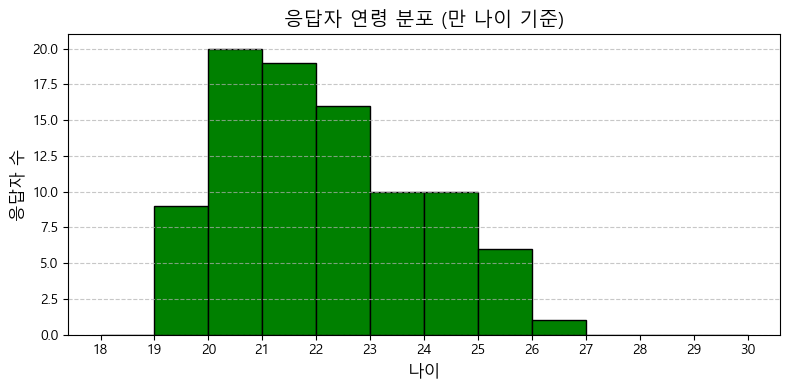

In [3]:
import matplotlib.pyplot as plt

# '만나이'에서 숫자만 추출 (예: '만 24세' → 24)
df['만나이'] = df['만나이'].astype(str).str.extract(r'(\d+)')
df['만나이'] = pd.to_numeric(df['만나이'], errors='coerce')

plt.rc('font',family="Malgun Gothic")

# 히스토그램 그리기
plt.figure(figsize=(8, 4))
plt.hist(df['만나이'].dropna(), bins=range(18, 31), edgecolor='black',color='g')
plt.title('응답자 연령 분포 (만 나이 기준)', fontsize=14)
plt.xlabel('나이', fontsize=12)
plt.ylabel('응답자 수', fontsize=12)
plt.xticks(range(18, 31))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [4]:
college_mapping = {
    '예술대학': '예술대학',
    '문과대학': '문과대학',
    '인문사회과학 대학': '문과대학',  # 실제 단과대학 명칭 아님, 문과대학으로 통합
    '사회과학대학': '사회과학대학',
    '경영대학': '경영대학',
    '자연과학대학': '자연과학대학',
    '문과대학 사학과': '문과대학',  # 소속 학과로 단과대학에 매핑
    '소프트웨어대학': '소프트웨어융합대학',
    '정보통신대학': '정보통신대학',
    '공과대학': '공과대학',
    '인문대학': '문과대학',  # 명칭 혼용, 문과대학으로 통합
    '사범': '사범대학',
    '소프트웨어융합대학': '소프트웨어융합대학',
    '경제대학': '경제대학',
    '사회과학대학 ': '사회과학대학',  # 공백 제거
    '공학대학': '공과대학',
    '정보통신대': '정보통신대학',
    '전자전기공학부': '정보통신대학',
    '사회과학대힉': '사회과학대학',
    '정보통신대학 전자전기공학부': '정보통신대학',
    '글로벌리더학부': '글로벌리더학부',
    '유학대학': '유학대학',
    '상경대학': '경제대학',  # 과거 명칭, 경제대학으로 통합
    '문과대': '문과대학',
    '예술대학, 정보통신대학 복수전공': '예술대학',  # 복수전공은 리스트로 반환
    '사과대학': '사회과학대학',  # 오타
    '글로벌융합학부': '글로벌융합학부',
    '사범대': '사범대학',
    '사범대학': '사범대학'}
    
# 매핑 적용
df['소속대학_수정'] = df['소속대학'].map(college_mapping)

df['소속대학_수정'].unique()


array(['예술대학', '문과대학', '사회과학대학', '경영대학', '자연과학대학', '소프트웨어융합대학', '정보통신대학',
       '공과대학', '사범대학', '경제대학', '글로벌리더학부', '유학대학', '글로벌융합학부'], dtype=object)

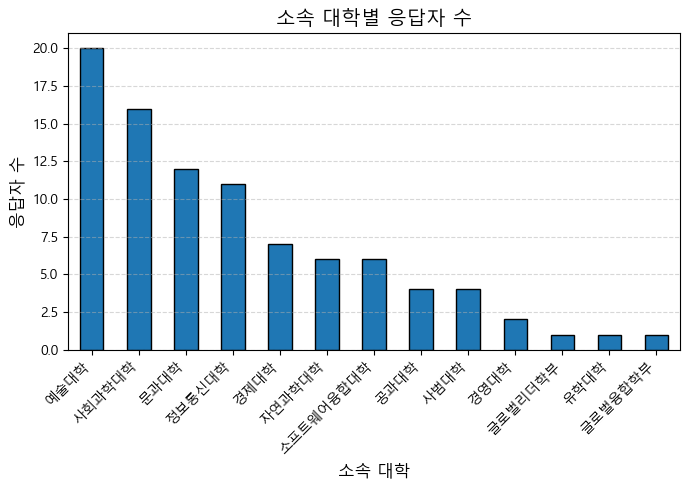

In [5]:
df_counts=df['소속대학_수정'].value_counts()

plt.figure(figsize=(7, 5))
df_counts.plot(kind='bar', edgecolor='black')

plt.title('소속 대학별 응답자 수', fontsize=14)
plt.xlabel('소속 대학', fontsize=12)
plt.ylabel('응답자 수', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [6]:
from collections import Counter

# 전체 사이트 목록을 리스트로 분리
all_sites = df['여타 사이트'].dropna().apply(lambda x: [s.strip() for s in x.split(',')])

# 평탄화 (flatten)
flat_list = [site for sublist in all_sites for site in sublist]

# 등장 빈도 세기
site_counts = pd.Series(Counter(flat_list)).sort_values(ascending=False)

site_df = site_counts.reset_index()
site_df.columns = ['사이트명', '응답자수']

site_mapping = {
    # 유튜브 관련
    '유튜브': '유튜브',
    '유튜브 구글': '유튜브',
    '유튜브!!!!': '유튜브',
    '유튜브, 넷플릭스': ['유튜브', '넷플릭스'],
    '유튜브, 캔바(canva)': ['유튜브', '캔바'],
    '유튜브, 핀터레스트': ['유튜브', '핀터레스트'],
    '유튜브에는 세계 각국의 교수님이나 대학원생들이 전공과목 관련 강의 영상을 업로드 하는 곳이라 교수님의 아이캠퍼스, 오프라인 수업의 설명이 충분하지 못했다고 생각이 들 때 유용하게 사용하고있습니다.': '유튜브',
    'YouTube': '유튜브',

    # 미리캔버스 관련
    '미리캔버스': '미리캔버스',
    '미리캔버스 ': '미리캔버스',
    '미리캔버스 유튜브': ['미리캔버스', '유튜브'],
    '미리캔버스(ppt 제작 목적)': '미리캔버스',
    '미리캔버스, 유튜브': ['미리캔버스', '유튜브'],
    '미리캔버스, 유튜브 등': ['미리캔버스', '유튜브'],
    '미리캔버스, 유튜브 등등': ['미리캔버스', '유튜브'],
    '미리캔버스, 어도비, 유튜브': ['미리캔버스', '어도비', '유튜브'],
    '미리캔버스, 어도비, 유튜브, 구글 스칼라': ['미리캔버스', '어도비', '유튜브', '구글 스칼라'],
    '미리캔버스, 어도비, 유튜브, 챗지피티, 리튼, 망고보드 등 ': ['미리캔버스', '어도비', '유튜브', 'ChatGPT', '뤼튼', '망고보드'],
    '미리캔버스, 구글독스, 학교학술정보관사이트, 유튜브 등': ['미리캔버스', '구글 독스', '학교 학술정보관', '유튜브'],
    '미리캔버스, 유튜브, LinkedIn, X ': ['미리캔버스', '유튜브', 'LinkedIn'],

    # 어도비 관련
    '어도비': '어도비',
    '어도비 ': '어도비',
    '어도비, canva, 미리캔버스': ['어도비', '캔바', '미리캔버스'],
    '어도비, 유튜브': ['어도비', '유튜브'],

    # 캔바 관련
    'canva': '캔바',
    '캔바': '캔바',
    '캔바(canva)': '캔바',
    'Canva': '캔바',

    # 구글 관련
    '구글': '구글',
    '구글링': '구글',
    '구글독스': '구글 독스',
    'Google scholar': '구글 스칼라',
    '구글 스칼라': '구글 스칼라',

    # 기타 툴
    '뤼튼, 노션': ['뤼튼', '노션'],
    '뤼튼, 미리캔버스, 유튜브': ['뤼튼', '미리캔버스', '유튜브'],
    'GitHub, 교보 전자도서관': ['GitHub', '교보 전자도서관'],
    '감마': '감마',
    '노션': '노션',
    '리튼': '뤼튼',
    'Quizlet': 'Quizlet',
    '핀터레스트': '핀터레스트',
    '넷플릭스': '넷플릭스',
    '학교학술정보관사이트': '학교 학술정보관',
    '교보 전자도서관': '교보 전자도서관',
    '망고보드 등': '망고보드',
    '챗지피티': 'ChatGPT',
    'LinkedIn': 'LinkedIn',
    '인스타': '인스타',

    # 부정 응답 / 무응답 처리
    'X': None,
    '없음': None,
    '없어요': None,
    '없습니다': None,
    '없음더': None,
    '따로 없다': None,
    '아니요': None,
    '.': None,}

def clean_and_map_sites(raw):
    if not isinstance(raw, str):
        return []
    
    parts = [p.strip() for p in raw.split(',')]
    result = []

    for part in parts:
        mapped = site_mapping.get(part)
        
        if isinstance(mapped, list):
            result.extend(mapped)
        elif isinstance(mapped, str):
            result.append(mapped)
        # None이면 추가하지 않음

    return result

df['사이트_정제'] = df['여타 사이트'].apply(clean_and_map_sites)

from collections import Counter

flat_list = [site for sublist in df['사이트_정제'] for site in sublist]
site_counts = pd.Series(Counter(flat_list)).sort_values(ascending=False)

site_df = site_counts.reset_index()
site_df.columns = ['사이트명', '응답자수']

site_df.head(6)

,사이트명,응답자수
0,유튜브,36
1,미리캔버스,25
2,어도비,13
3,캔바,5
4,구글,2
5,구글 독스,2


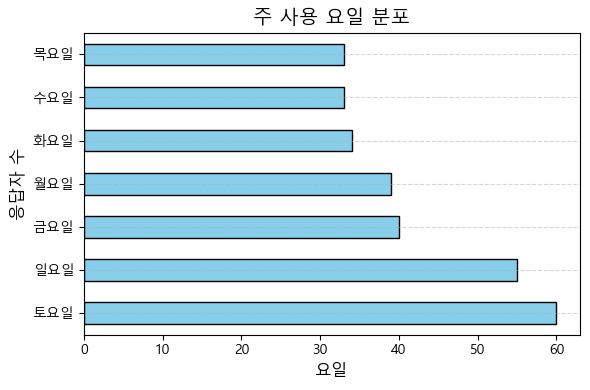

In [7]:
# 1. 결측치 제거 및 요일 분할
valid_days = df['주 사용 요일'].dropna()

# 2. 쉼표로 분할하고, 공백 제거
split_days = valid_days.apply(lambda x: [d.strip() for d in x.split(',')])

# 3. 리스트 평탄화 (flatten)
flat_days = [day for sublist in split_days for day in sublist]

# 4. 요일별 빈도 수 카운트
day_counts = pd.Series(Counter(flat_days)).sort_values(ascending=False)

# 5. 바차트 시각화
plt.figure(figsize=(6,4))
day_counts.plot(kind='barh', edgecolor='black', color='skyblue')
plt.title('주 사용 요일 분포', fontsize=14)
plt.xlabel('요일', fontsize=12)
plt.ylabel('응답자 수', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


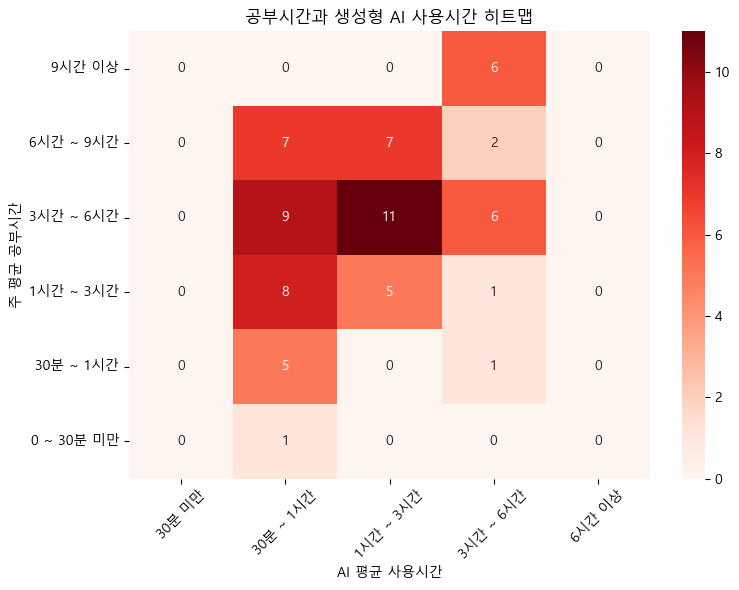

In [8]:
import seaborn as sns

# 생성형 AI 사용시간 범주 → 수치 매핑
ai_time_order = ['30분 미만', '30분 ~ 1시간', '1시간 ~ 3시간', '3시간 ~ 6시간', '6시간 이상']
ai_time_map = {label: i for i, label in enumerate(ai_time_order)}
df['AI_사용시간_수치'] = df['AI 평균 사용시간'].map(ai_time_map)

# 공부시간 범주 → 수치 매핑
study_time_order = [
    '9시간 이상',
    '6시간 ~ 9시간',
    '3시간 ~ 6시간',
    '1시간 ~ 3시간',
    '30분 ~ 1시간',
    '0 ~ 30분 미만'
]
study_time_map = {label: i for i, label in enumerate(study_time_order)}
df['공부시간_수치'] = df['본인의 주 평균 공부 시간 (중간, 기말, 과제 포함)'].map(study_time_map)

# 3. 교차표 생성 (빈도 기반)
heatmap_data = pd.crosstab(
    df['본인의 주 평균 공부 시간 (중간, 기말, 과제 포함)'],
    df['AI 평균 사용시간']
).reindex(index=study_time_order, columns=ai_time_order, fill_value=0)

# 4. 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Reds')

plt.title('공부시간과 생성형 AI 사용시간 히트맵')
plt.xlabel('AI 평균 사용시간')
plt.ylabel('주 평균 공부시간')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

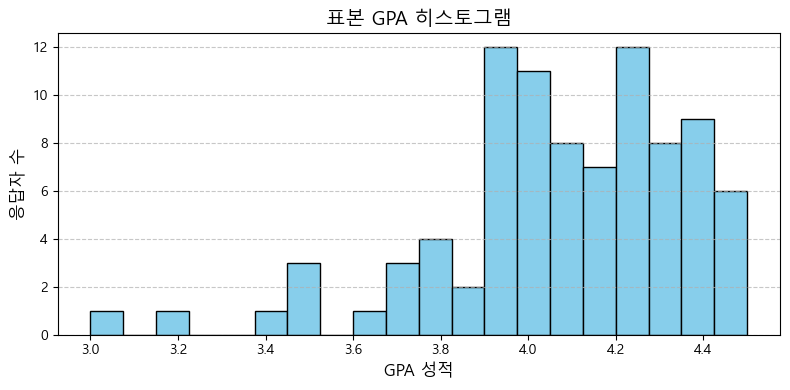

In [9]:
# GPA를 먼저 정제합니다.
import re
import numpy as np

# 정제 함수 정의
def clean_gpa(val):
    if not isinstance(val, str):
        return np.nan
    match = re.search(r'\d+(\.\d+)?', val)  # 소수점 포함 첫 번째 숫자 추출
    if match:
        return float(match.group())
    else:
        return np.nan

# 적용 (예: GPA 열이 '24년 2학기 GPA 평점'인 경우)
df['GPA_정제'] = df['24년 2학기 GPA 평점'].apply(clean_gpa)

# 정제 결과 확인
df['GPA_정제']

plt.figure(figsize=(8, 4))
plt.hist(df['GPA_정제'], bins=20, edgecolor='black',color='skyblue')
plt.title('표본 GPA 히스토그램', fontsize=14)
plt.xlabel('GPA 성적', fontsize=12)
plt.ylabel('응답자 수', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


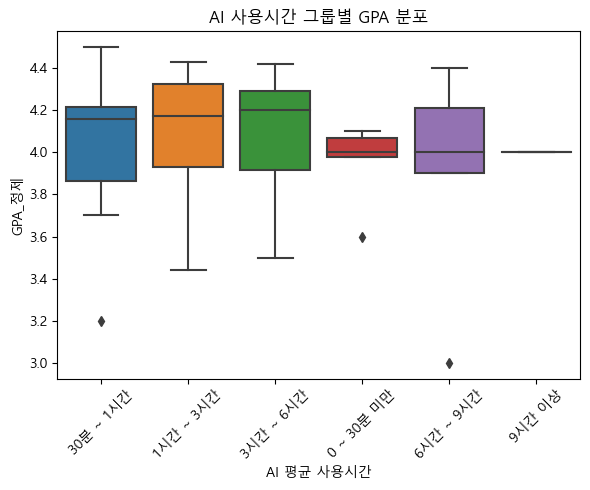

In [10]:
# 사용시간 별 GPA 평균 시각화

df['AI 평균 사용시간'].value_counts()
df['AI 평균 사용시간'].value_counts(normalize=True)

df.groupby('AI 평균 사용시간')['GPA_정제'].mean()
df.sort_values(by='GPA_정제',ascending=False)


import seaborn as sns

plt.figure(figsize=(6, 5))
sns.boxplot(x='AI 평균 사용시간', y='GPA_정제', data=df)

plt.title('AI 사용시간 그룹별 GPA 분포')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


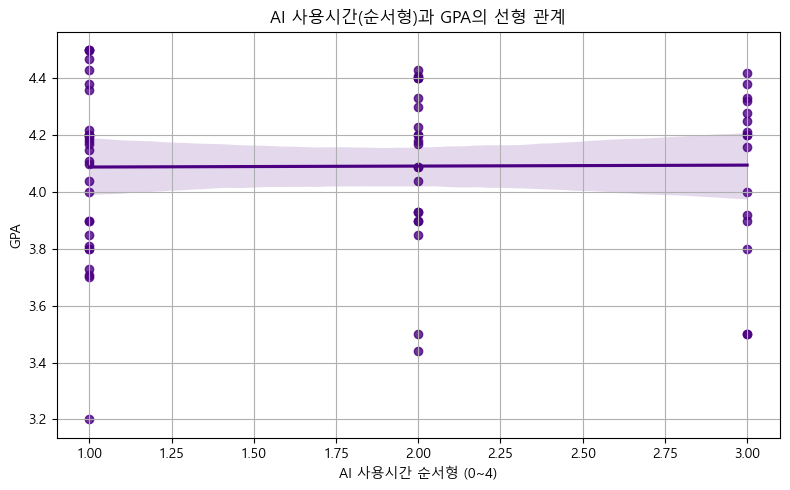

In [11]:


시간순서 = ['30분 미만', '30분 ~ 1시간', '1시간 ~ 3시간', '3시간 ~ 6시간', '6시간 이상']
사용시간_매핑 = {label: idx for idx, label in enumerate(시간순서)}

from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# 예시 매핑
시간순서 = ['30분 미만', '30분 ~ 1시간', '1시간 ~ 3시간', '3시간 ~ 6시간', '6시간 이상']
사용시간_매핑 = {label: idx for idx, label in enumerate(시간순서)}

# 매핑 적용
df['AI_사용시간_순서형'] = df['AI 평균 사용시간'].map(사용시간_매핑)
df['GPA_정제'] = df['24년 2학기 GPA 평점'].apply(clean_gpa)  # 앞서 정의한 정제 함수

# 결측치 제거
reg_df = df[['AI_사용시간_순서형', 'GPA_정제']].dropna()

plt.figure(figsize=(8, 5))
sns.regplot(x='AI_사용시간_순서형', y='GPA_정제', data=df,color='indigo')
plt.title('AI 사용시간(순서형)과 GPA의 선형 관계')
plt.xlabel('AI 사용시간 순서형 (0~4)')
plt.ylabel('GPA')
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# 1. 사이트 정제 리스트에서 평탄화
flat_list = [site for sublist in df['사이트_정제'] if isinstance(sublist, list) for site in sublist]

# 2. 상위 5개 사이트 추출
top5_sites = [site for site, count in Counter(flat_list).most_common(5)]

# 3. 데이터 필터링: 사용시간 & 사이트 리스트 모두 유효한 행
subset = df[['AI 평균 사용시간', '사이트_정제']].dropna()

# 4. 사이트 리스트를 explode → 행 분리
exploded = subset.explode('사이트_정제').dropna()

# 5. 상위 5개 사이트만 필터링
exploded_top5 = exploded[exploded['사이트_정제'].isin(top5_sites)]

# 6. 그룹화: 사용시간별 사이트별 사용 수
result_site = exploded_top5.groupby('AI 평균 사용시간')['사이트_정제'].value_counts().unstack(fill_value=0)

# 7. 결과 출력
result_site

사이트_정제,구글 스칼라,미리캔버스,어도비,유튜브,캔바
AI 평균 사용시간,,,,,
0 ~ 30분 미만,0,2,1,2,1
1시간 ~ 3시간,0,8,3,12,1
30분 ~ 1시간,1,7,4,8,1
3시간 ~ 6시간,1,7,3,9,2
6시간 ~ 9시간,0,1,2,5,0


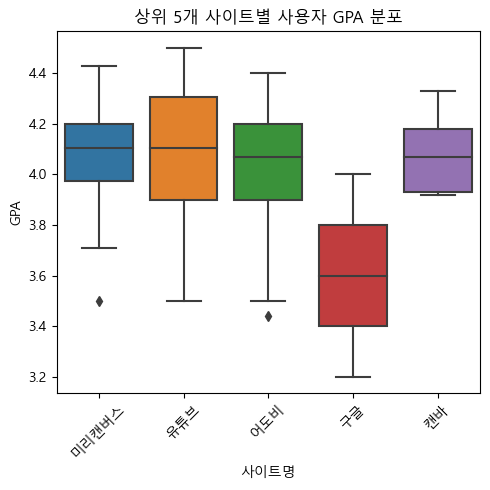

In [13]:
# 사이트 정제 리스트 컬럼 생성
df['사이트_정제'] = df['여타 사이트'].apply(clean_and_map_sites)

# explode로 사이트별 행 분리
df_exploded = df[['사이트_정제', 'GPA_정제']].explode('사이트_정제').dropna()

# 상위 5개 사이트 추출
top5_sites = pd.Series(Counter(df_exploded['사이트_정제'])).sort_values(ascending=False).head(5).index.tolist()

# 상위 5개 사이트만 필터링
df_top5 = df_exploded[df_exploded['사이트_정제'].isin(top5_sites)]

# 박스플롯 시각화
plt.figure(figsize=(5, 5))
sns.boxplot(x='사이트_정제', y='GPA_정제', data=df_top5)
plt.title('상위 5개 사이트별 사용자 GPA 분포')
plt.xlabel('사이트명')
plt.ylabel('GPA')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='AI 사용시간 증가비', ylabel='GPA_정제'>

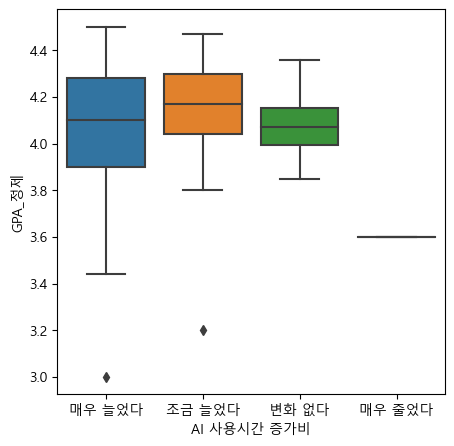

In [14]:
plt.figure(figsize=(5, 5))

sns.boxplot(x='AI 사용시간 증가비', y='GPA_정제', data=df)

In [23]:
high=df[df['AI 사용시간 증가비']=='매우 늘었다']
mid=df[df['AI 사용시간 증가비']=='조금 늘었다']
low=df[df['AI 사용시간 증가비']=='변화 없다']

def primary_descriptive(data,list_):
    list_.append(data['GPA_정제'].mean())
    list_.append(data['GPA_정제'].var())
    list_.append(data['GPA_정제'].std())

high_des=[]
mid_des=[]
low_des=[]

primary_descriptive(high,high_des)
primary_descriptive(mid,mid_des)
primary_descriptive(low,low_des)

print("AI 사용시간 증가 집단과 GPA 간 기본 기술통계")
print("평균   //   분산   //   표준편차")
print("매우 늘었다:",high_des)
print("조금 늘었다:",mid_des)
print("변화 없다:",low_des)

AI 사용시간 증가 집단과 GPA 간 기본 기술통계
평균   //   분산   //   표준편차
매우 늘었다: [4.052807017543861, 0.09196697994987468, 0.3032605809363866]
조금 늘었다: [4.118, 0.07214999999999998, 0.2686075203712658]
변화 없다: [4.083333333333333, 0.03026666666666669, 0.17397317800933193]


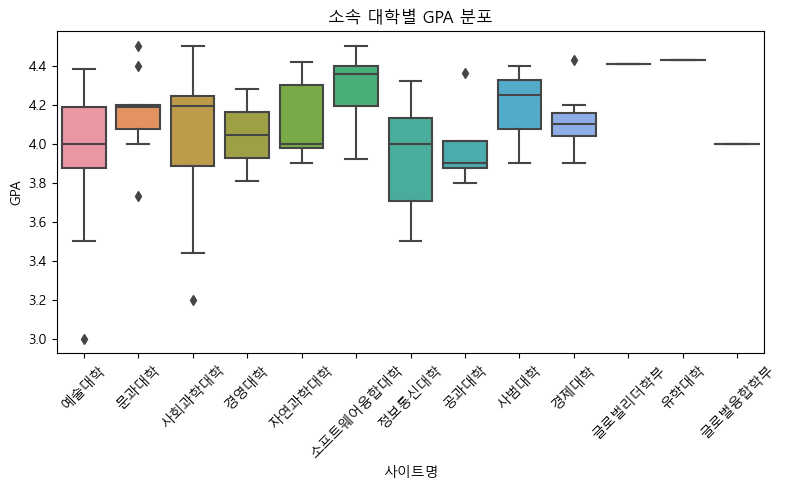

In [15]:
# 박스플롯 시각화
plt.figure(figsize=(8, 5))
sns.boxplot(x='소속대학_수정', y='GPA_정제', data=df)
plt.title('소속 대학별 GPA 분포')
plt.xlabel('사이트명')
plt.ylabel('GPA')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

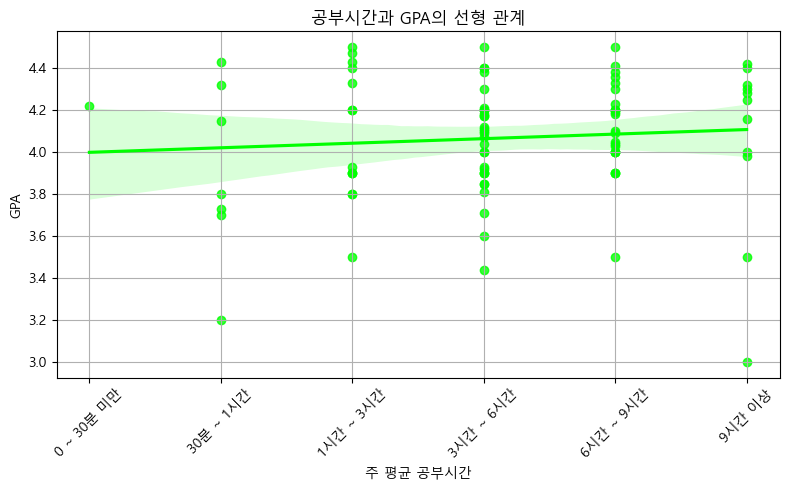

In [16]:
# 공부시간 순서 (많이 → 적게)
study_time_order = [
    '0 ~ 30분 미만',
    '30분 ~ 1시간',
    '1시간 ~ 3시간',
    '3시간 ~ 6시간',
    '6시간 ~ 9시간',
    '9시간 이상'
]

study_time_map = {label: i for i, label in enumerate(study_time_order)}
df['공부시간_수치'] = df['본인의 주 평균 공부 시간 (중간, 기말, 과제 포함)'].map(study_time_map)

# 4. 유효한 데이터 필터링
valid_df = df[['공부시간_수치', 'GPA_정제']].dropna()

plt.figure(figsize=(8, 5))
sns.regplot(x='공부시간_수치', y='GPA_정제', data=df, color='lime')

# X축 눈금을 범주형 텍스트로 복원
plt.xticks(ticks=range(len(study_time_order)), labels=study_time_order, rotation=45)

plt.title('공부시간과 GPA의 선형 관계')
plt.xlabel('주 평균 공부시간')
plt.ylabel('GPA')
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# 공부시간과 GPA 간 설명력 계산
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

# 1. 유효 데이터만 추출
valid_df = df[['공부시간_수치', 'GPA_정제']].dropna()

# 2. 회귀 분석
X = valid_df[['공부시간_수치']].values
y = valid_df['GPA_정제'].values

model = LinearRegression()
model.fit(X, y)

# 3. 결과 추출
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)
corr, pval = pearsonr(valid_df['공부시간_수치'], valid_df['GPA_정제'])

# 4. 출력
print(f"📈 회귀식: GPA = {intercept:.3f} + {slope:.3f} × 공부시간_수치")
print(f"📊 설명력 (R²): {r_squared:.4f}")
print(f"📎 피어슨 상관계수: {corr:.3f}, p-value: {pval:.4f}")

📈 회귀식: GPA = 3.999 + 0.022 × 공부시간_수치
📊 설명력 (R²): 0.0075
📎 피어슨 상관계수: 0.087, p-value: 0.4191


In [19]:
# AI 사용시간과 GPA 간 설명력 계산

# 1. 유효 데이터만 추출
valid_df = df[['AI_사용시간_순서형', 'GPA_정제']].dropna()

# 2. 회귀 분석
X = valid_df[['AI_사용시간_순서형']].values
y = valid_df['GPA_정제'].values

model = LinearRegression()
model.fit(X, y)

# 3. 결과 추출
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)
corr, pval = pearsonr(valid_df['AI_사용시간_순서형'], valid_df['GPA_정제'])

# 4. 출력
print(f"📈 회귀식: GPA = {intercept:.3f} + {slope:.3f} × AI_사용시간_순서형")
print(f"📊 설명력 (R²): {r_squared:.4f}")
print(f"📎 피어슨 상관계수: {corr:.3f}, p-value: {pval:.4f}")

📈 회귀식: GPA = 4.085 + 0.003 × AI_사용시간_순서형
📊 설명력 (R²): 0.0001
📎 피어슨 상관계수: 0.009, p-value: 0.9395
